In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import pickle
from matplotlib import pyplot
from keras.optimizers import SGD
np.set_printoptions(threshold=np.sys.maxsize)

/Users/omristeinberg-tatman/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
#define the data
FullData = pd.read_csv("Mux_Correction_Data.csv")

x, y = FullData.values[:, 2:-1], FullData.values[:, -1:]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3333)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
n_features = x_train.shape[1]

(66670, 11) (33330, 11) (66670, 1) (33330, 1)


In [3]:
# define the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(100, input_shape=(n_features,), activation= "relu"))
model.add(tf.keras.layers.Dense(80, activation= "relu"))
model.add(tf.keras.layers.Dense(80, activation= "relu"))
model.add(tf.keras.layers.Dense(80, activation= "relu"))
model.add(tf.keras.layers.Dense(30, activation= "relu"))
model.add(tf.keras.layers.Dense(30, activation= "relu"))
model.add(tf.keras.layers.Dense(30, activation= "relu"))
model.add(tf.keras.layers.Dense(30, activation= "relu"))
model.add(tf.keras.layers.Dense(10, activation= "relu"))
model.add(tf.keras.layers.Dense(10, activation= "relu"))
model.add(tf.keras.layers.Dense(10, activation= "relu"))
model.add(tf.keras.layers.Dense(5, activation= "relu"))
model.add(tf.keras.layers.Dense(5, activation= "relu"))
model.add(tf.keras.layers.Dense(5, activation= "relu"))
model.add(tf.keras.layers.Dense(5, activation= "relu"))
model.add(tf.keras.layers.Dense(5, activation= "relu"))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
predictions = model(np.asarray(x_train).astype('float32')).numpy()
opt = SGD(lr=0.01)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=['accuracy'])

In [6]:
history = model.fit(x_train, y_train, epochs=1)

2084/2084 [==============================] - 3s 1ms/step - loss: 5.7934e-07 - accuracy: 1.0000


Train: 1.000, Test: 1.000


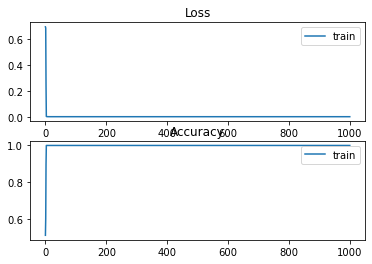

In [10]:
_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.legend()
pyplot.show()

In [11]:
with open('Muxcorrectionmodel.pkl', 'wb') as f:
    pickle.dump({'weights': model.get_weights(), 'history': history.history}, f)

In [4]:
# load the weights and history from the file and evaluate the model
with open('Muxcorrectionmodel.pkl', 'rb') as f:
    data = pickle.load(f)
model.set_weights(data['weights'])

In [5]:
y_pred = model.predict(x_test)
y_pred_classes = np.round(y_pred).flatten()

# compute class-wise accuracy and confusion matrix
class_0_correct = 0
class_0_total = 0
class_0_true_0 = 0
class_0_false_1 = 0
class_1_correct = 0
class_1_total = 0
class_1_true_1 = 0
class_1_false_0 = 0
for i in range(len(y_test)):
    true_class = y_test[i]
    pred_class = y_pred_classes[i]
    if true_class == 0:
        class_0_total += 1
        if pred_class == 0:
            class_0_correct += 1
            class_0_true_0 += 1
        else:
            class_0_false_1 += 1
    elif true_class == 1:
        class_1_total += 1
        if pred_class == 1:
            class_1_correct += 1
            class_1_true_1 += 1
        else:
            class_1_false_0 += 1

class_0_accuracy = class_0_correct / class_0_total
class_1_accuracy = class_1_correct / class_1_total

print("Class 0:")
print(f"  Total: {class_0_total}")
print(f"  Correct: {class_0_correct}")
print(f"  True 0: {class_0_true_0}")
print(f"  False 1: {class_0_false_1}")
print(f"  Accuracy: {class_0_accuracy}")
print("Class 1:")
print(f"  Total: {class_1_total}")
print(f"  Correct: {class_1_correct}")
print(f"  True 1: {class_1_true_1}")
print(f"  False 0: {class_1_false_0}")
print(f"  Accuracy: {class_1_accuracy}")

Class 0:
  Total: 16718
  Correct: 16718
  True 0: 16718
  False 1: 0
  Accuracy: 1.0
Class 1:
  Total: 16612
  Correct: 16612
  True 1: 16612
  False 0: 0
  Accuracy: 1.0
